In [ ]:
# Importing the library Dependences
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from keras.datasets import mnist
from tensorflow.keras.models import Sequential #type: ignore
from tensorflow.keras.layers import Dense,Flatten #type: ignore
tf.random.set_seed(3)
from tensorflow.math import confusion_matrix #type: ignore

Loading the MNIST dataset from keras

In [45]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [46]:
(x_train.shape),(y_train.shape),(x_test.shape),(y_test.shape)

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [47]:
x_train=x_train/255
x_test=x_test/255

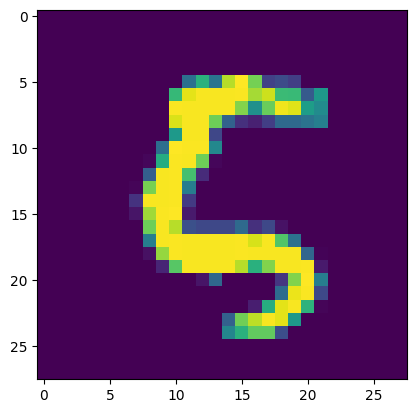

In [48]:
plt.imshow(x_train[2000])
plt.show()

In [49]:
np.unique(y_train),np.unique(y_test)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8))

Model training

In [50]:
model=Sequential([
    Flatten(input_shape=((28,28))),
    Dense(50,activation='relu'),
    Dense(50,activation='relu'),
    Dense(10,activation='sigmoid')
])

d:\muthupandian\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [51]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [52]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping=EarlyStopping(monitor='val_loss',patience=3,restore_best_weights=True)

In [53]:
histroy=model.fit(x_train,y_train,epochs=10,validation_split=0.1,
                  callbacks=[early_stopping])

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9117 - loss: 0.3005 - val_accuracy: 0.9598 - val_loss: 0.1341
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9570 - loss: 0.1437 - val_accuracy: 0.9680 - val_loss: 0.1053
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9695 - loss: 0.1048 - val_accuracy: 0.9733 - val_loss: 0.0937
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9753 - loss: 0.0830 - val_accuracy: 0.9747 - val_loss: 0.0916
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9796 - loss: 0.0683 - val_accuracy: 0.9760 - val_loss: 0.0937
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9827 - loss: 0.0572 - val_accuracy: 0.9757 - val_loss: 0.0983
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9858 - loss: 0.0475 - val_accuracy: 0.9722 - val_loss: 0.1090


In [54]:
loss, accuracy=model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9713 - loss: 0.0951


In [59]:
y_pred=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [60]:
y_pred

array([[1.50382500e-02, 2.23185401e-02, 8.66372824e-01, ...,
        9.99756992e-01, 1.33276716e-01, 2.87381262e-01],
       [2.87732226e-04, 3.96462947e-01, 9.99942064e-01, ...,
        1.23038194e-06, 4.58541363e-01, 3.06012516e-04],
       [2.30054883e-03, 9.99764860e-01, 5.66197395e-01, ...,
        5.13109803e-01, 3.89236927e-01, 2.41165869e-02],
       ...,
       [1.01987662e-05, 1.09371624e-03, 1.07999906e-04, ...,
        4.71721560e-01, 2.90015489e-01, 8.44198227e-01],
       [4.79225535e-03, 3.38714081e-03, 5.94270432e-07, ...,
        3.03866714e-03, 9.84480619e-01, 3.85361782e-05],
       [2.08891064e-01, 9.25099812e-06, 1.51819391e-02, ...,
        3.99868761e-04, 2.98330822e-04, 3.66704711e-08]],
      shape=(10000, 10), dtype=float32)

In [74]:
y_pred_label=[np.argmax(i) for i in y_pred]
print(y_pred_label)

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4), np.int64(1), np.int64(4), np.int64(9), np.int64(6), np.int64(9), np.int64(0), np.int64(6), np.int64(9), np.int64(0), np.int64(1), np.int64(5), np.int64(9), np.int64(7), np.int64(3), np.int64(4), np.int64(9), np.int64(6), np.int64(6), np.int64(5), np.int64(4), np.int64(0), np.int64(7), np.int64(4), np.int64(0), np.int64(1), np.int64(3), np.int64(1), np.int64(3), np.int64(4), np.int64(7), np.int64(2), np.int64(7), np.int64(1), np.int64(2), np.int64(1), np.int64(1), np.int64(7), np.int64(4), np.int64(2), np.int64(3), np.int64(5), np.int64(1), np.int64(2), np.int64(4), np.int64(4), np.int64(6), np.int64(3), np.int64(5), np.int64(5), np.int64(6), np.int64(0), np.int64(4), np.int64(1), np.int64(9), np.int64(5), np.int64(7), np.int64(8), np.int64(9), np.int64(3), np.int64(7), np.int64(4), np.int64(6), np.int64(4), np.int64(3), np.int64(0), np.int64(7), np.int64(0), np.int64(2), np.int64(9), np.int64(1), np.int64(7), np.int64(3)

1


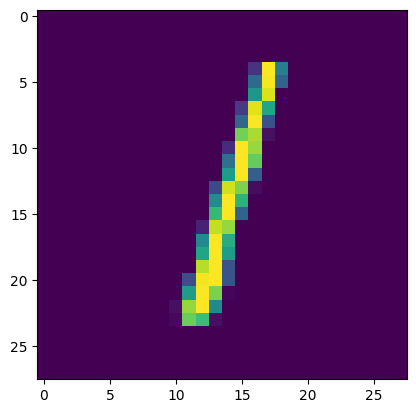

In [78]:
y_pred_label1=np.argmax(y_pred[2])
plt.imshow(x_test[2])
print(y_pred_label1)

Text(95.72222222222221, 0.5, 'truth value')

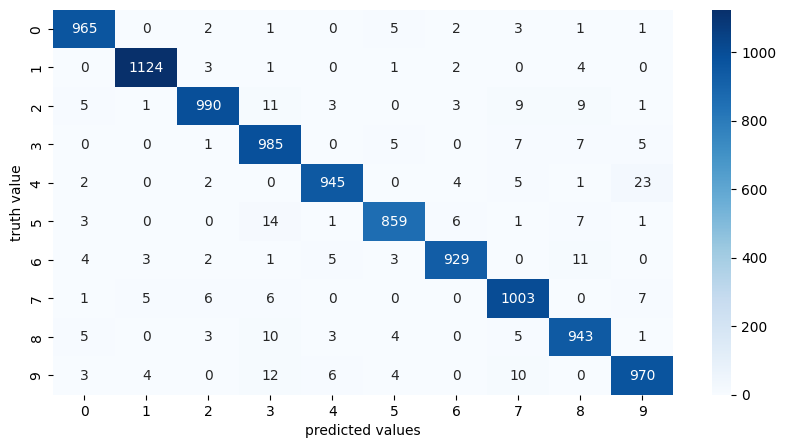

In [91]:
confusion_mat=confusion_matrix(y_test,y_pred_label)
plt.figure(figsize=(10,5))
sns.heatmap(confusion_mat, annot=True, fmt='d',cmap='Blues')
plt.xlabel('predicted values')
plt.ylabel('truth value')

predicting for new data

In [117]:
input_img=input('image location:' )

In [118]:
img=cv2.imread(input_img)
gray=cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gray_resize=cv2.resize(gray,(28,28))
gray_array=np.asarray(gray_resize)
img_scaled=gray_array/255
img_reshape=img_scaled.reshape(1,28,28)

In [119]:
input_prediction=model.predict(img_reshape)
input_prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


array([[1.9858370e-04, 1.9240979e-04, 1.7728273e-02, 3.0889130e-01,
        8.5948676e-01, 8.2866013e-01, 2.6974676e-05, 3.8965780e-01,
        2.1051159e-02, 9.9998653e-01]], dtype=float32)

In [120]:
input_pred_label=np.argmax(input_prediction)
print(input_pred_label)

9
